# Descomposition of Time Series

By Alberto Valdés

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

Before the analysis of a Time Series a fundamental step is the descomposition on all its components.

# 1. Lectura DataFrame

In [3]:
df = pd.read_csv('Airpassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df['Time'] = df['Month'].apply(lambda x: x.year + (x.month - 1)/12 + x.day/360)

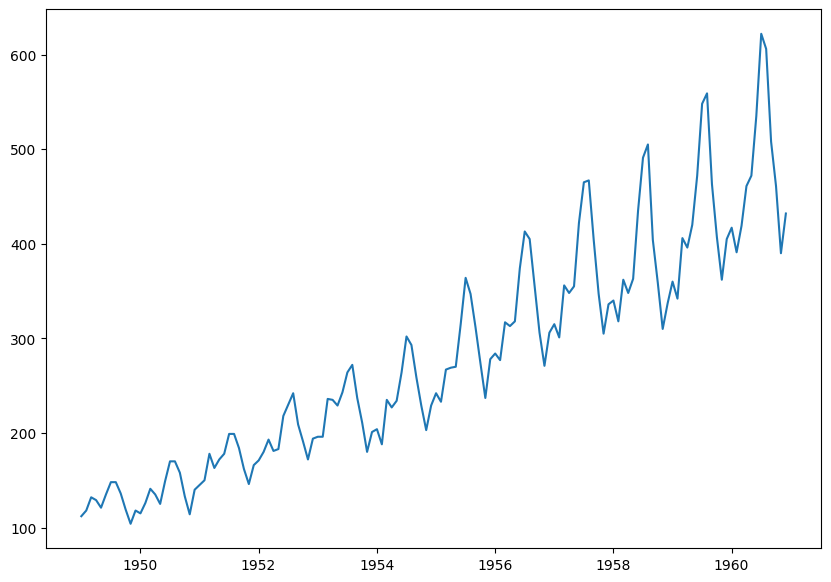

In [4]:
plt.figure(figsize = (10, 7))

plt.plot(df['Time'], df['#Passengers'])

plt.show()

# 2. Split Dataset

In [5]:
df_train = df[df['Time'] <= 1959].copy()
df_test = df[df['Time'] > 1959].copy()

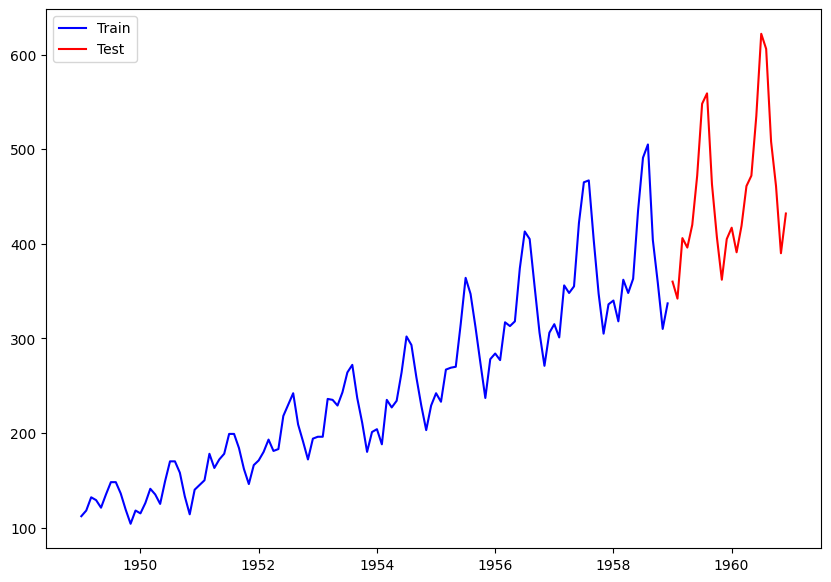

In [6]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['#Passengers'], color = 'blue', label = 'Train')
plt.plot(df_test['Time'], df_test['#Passengers'], color = 'red', label = 'Test')

plt.legend()

plt.show()

# 3. Descomposition

In [7]:
series = df_train[['#Passengers']]
series.index = df_train['Month']

In [8]:
result = seasonal_decompose(series, model = 'additive', extrapolate_trend = 'freq')

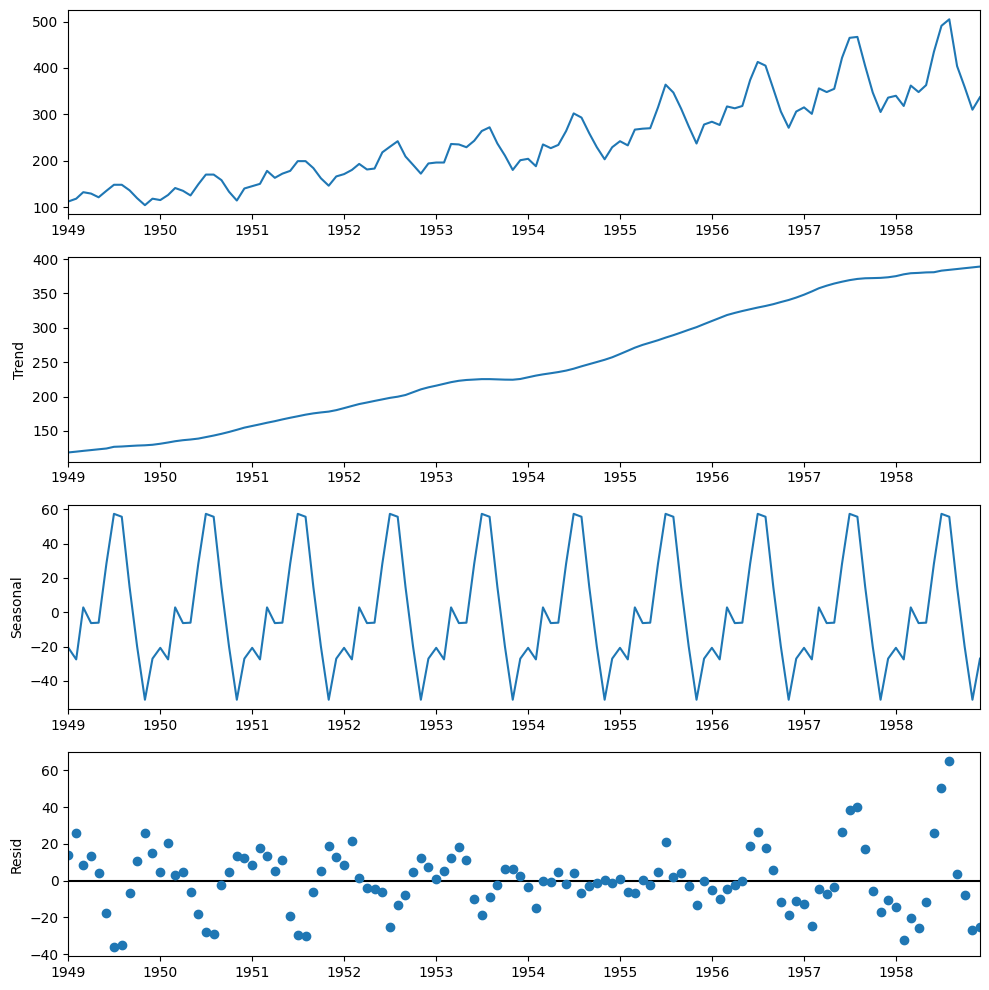

In [9]:
fig = result.plot()
fig.set_size_inches((10, 10))
fig.tight_layout()
plt.show()

In [10]:
trend = result.trend
trend = trend.reset_index()
trend = trend.drop(columns = ['Month'])

In [11]:
df_train['trend'] = trend

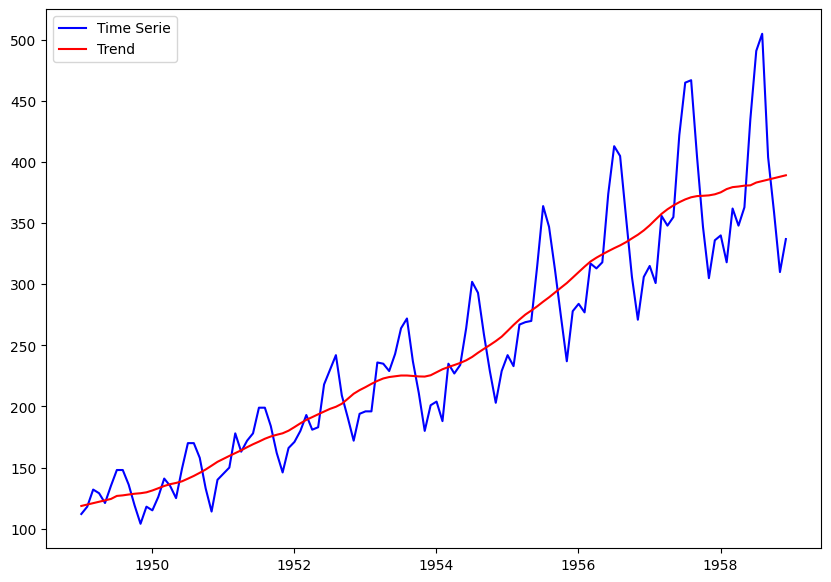

In [12]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['#Passengers'], color = 'blue', label = 'Time Serie')
plt.plot(df_train['Time'], df_train['trend'], color = 'red', label = 'Trend')

plt.legend()

plt.show()

# 4. Model for Trend

In [13]:
reg = LinearRegression().fit(df_train[['Time']], df_train['trend'])

In [14]:
df_train['pred_trend'] = reg.predict(df_train[['Time']])

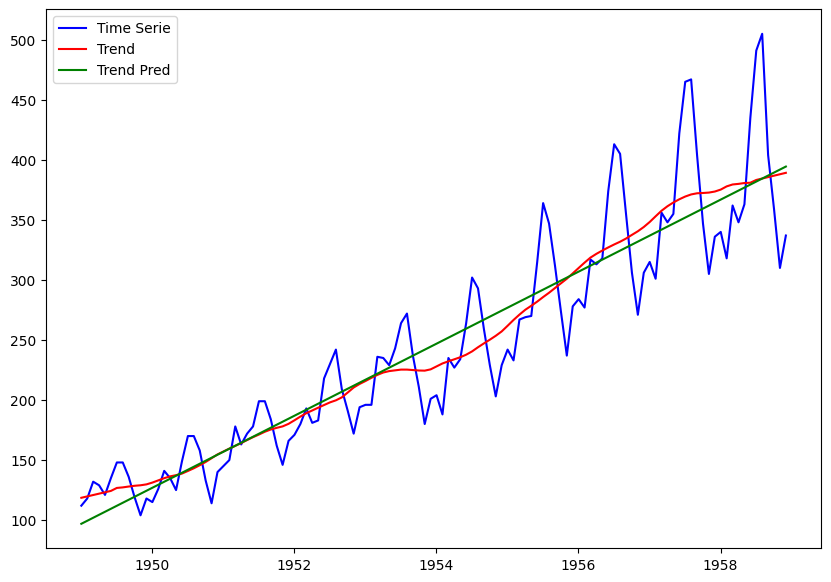

In [15]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['#Passengers'], color = 'blue', label = 'Time Serie')
plt.plot(df_train['Time'], df_train['trend'], color = 'red', label = 'Trend')
plt.plot(df_train['Time'], df_train['pred_trend'], color = 'green', label = 'Trend Pred')

plt.legend()

plt.show()

In [16]:
df_train['seasonal'] = df_train['#Passengers'] - df_train['pred_trend']

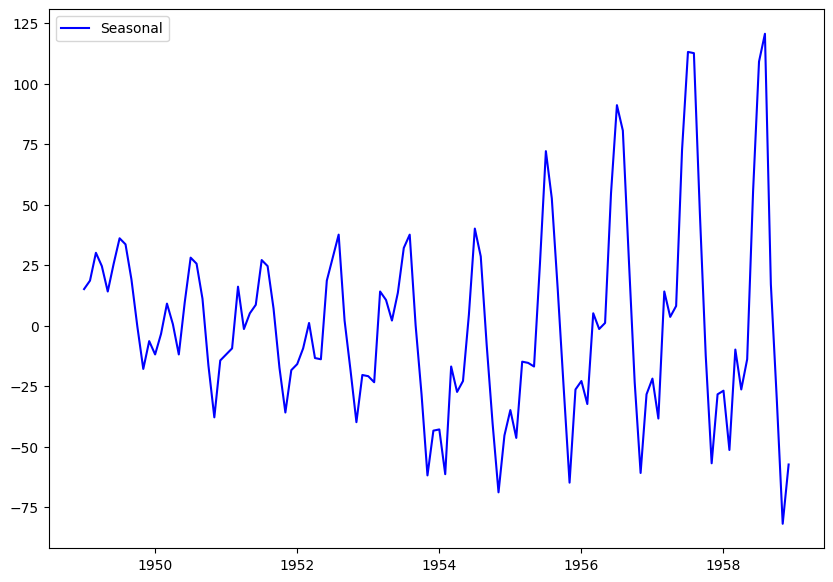

In [17]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['seasonal'], color = 'blue', label = 'Seasonal')

plt.legend()

plt.show()

As you can see we have an amplification of seasonality, for this we want to divide this component by another which increases in function of the time.

# 5. New Descomposition

In [18]:
series = abs(df_train[['seasonal']]) + 1
series.index = df_train['Month']

In [19]:
result = seasonal_decompose(series, model = 'additive', extrapolate_trend = 'freq')

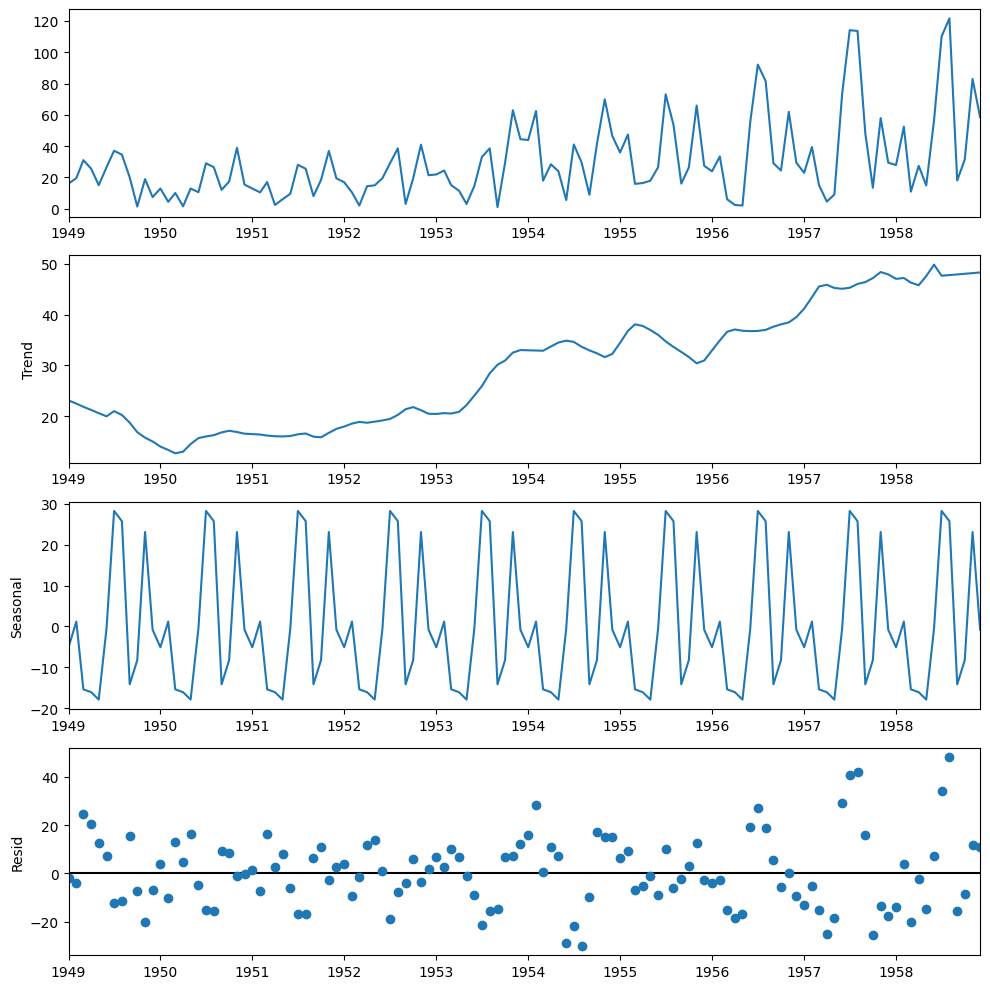

In [20]:
fig = result.plot()
fig.set_size_inches((10, 10))
fig.tight_layout()
plt.show()

In [21]:
trend_s = result.trend
trend_s = trend_s.reset_index()
trend_s = trend_s.drop(columns = ['Month'])

In [22]:
df_train['trend_s'] = trend_s

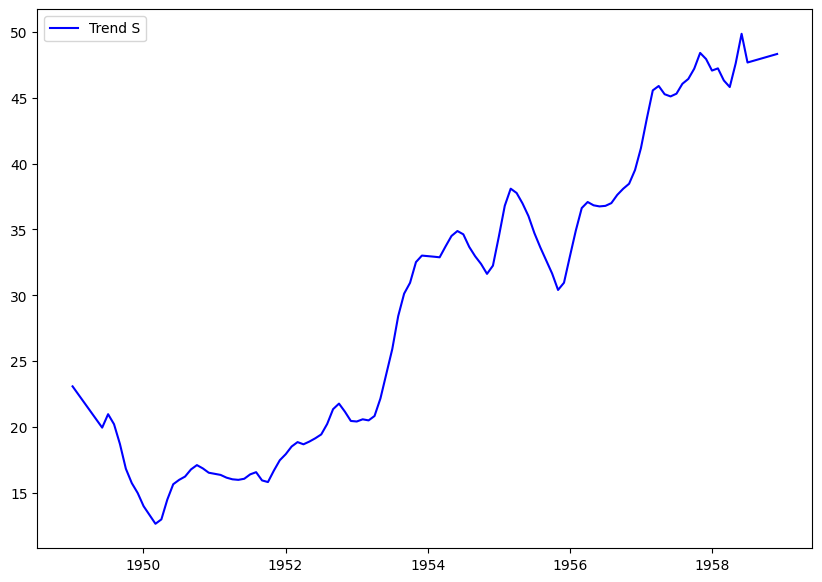

In [23]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['trend_s'], color = 'blue', label = 'Trend S')

plt.legend()

plt.show()

# 6. Predict of the trend of seasonality

In [24]:
reg = LinearRegression().fit(df_train[['Time']], df_train['trend_s'])

In [25]:
df_train['pred_trend_s'] = reg.predict(df_train[['Time']])

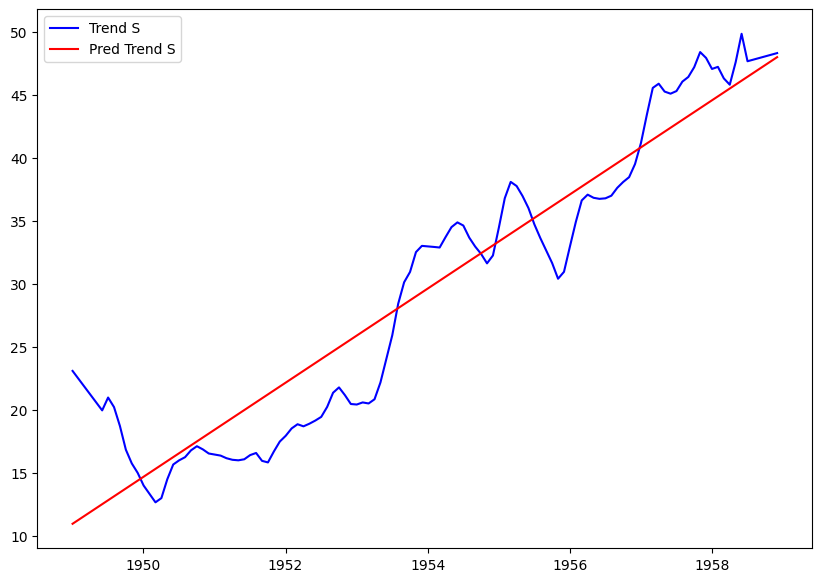

In [26]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['trend_s'], color = 'blue', label = 'Trend S')
plt.plot(df_train['Time'], df_train['pred_trend_s'], color = 'red', label = 'Pred Trend S')

plt.legend()

plt.show()

In [27]:
df_train['seasonal_def'] = df_train['seasonal']/df_train['pred_trend_s']

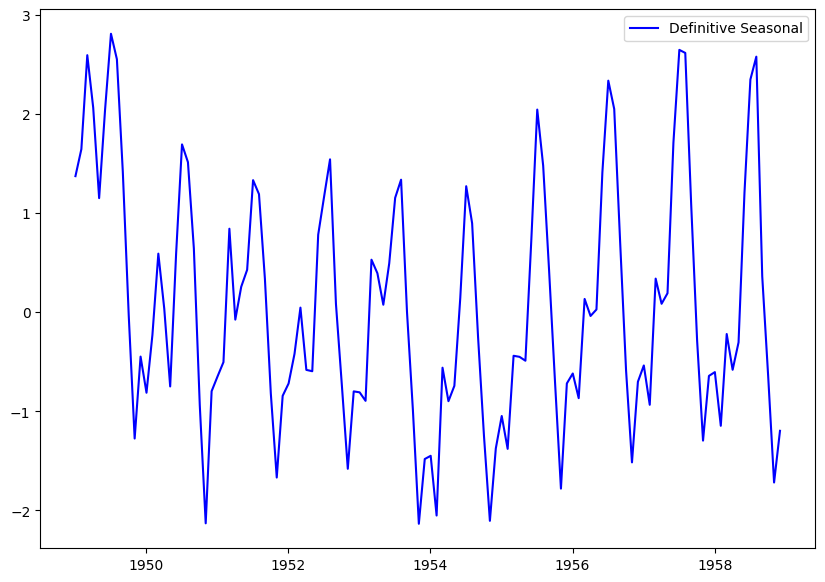

In [28]:
plt.figure(figsize = (10, 7))

plt.plot(df_train['Time'], df_train['seasonal_def'], color = 'blue', label = 'Definitive Seasonal')

plt.legend()

plt.show()

Now we can finally analyze the seasonal component.